# [탈출](https://www.acmicpc.net/problem/3055)

  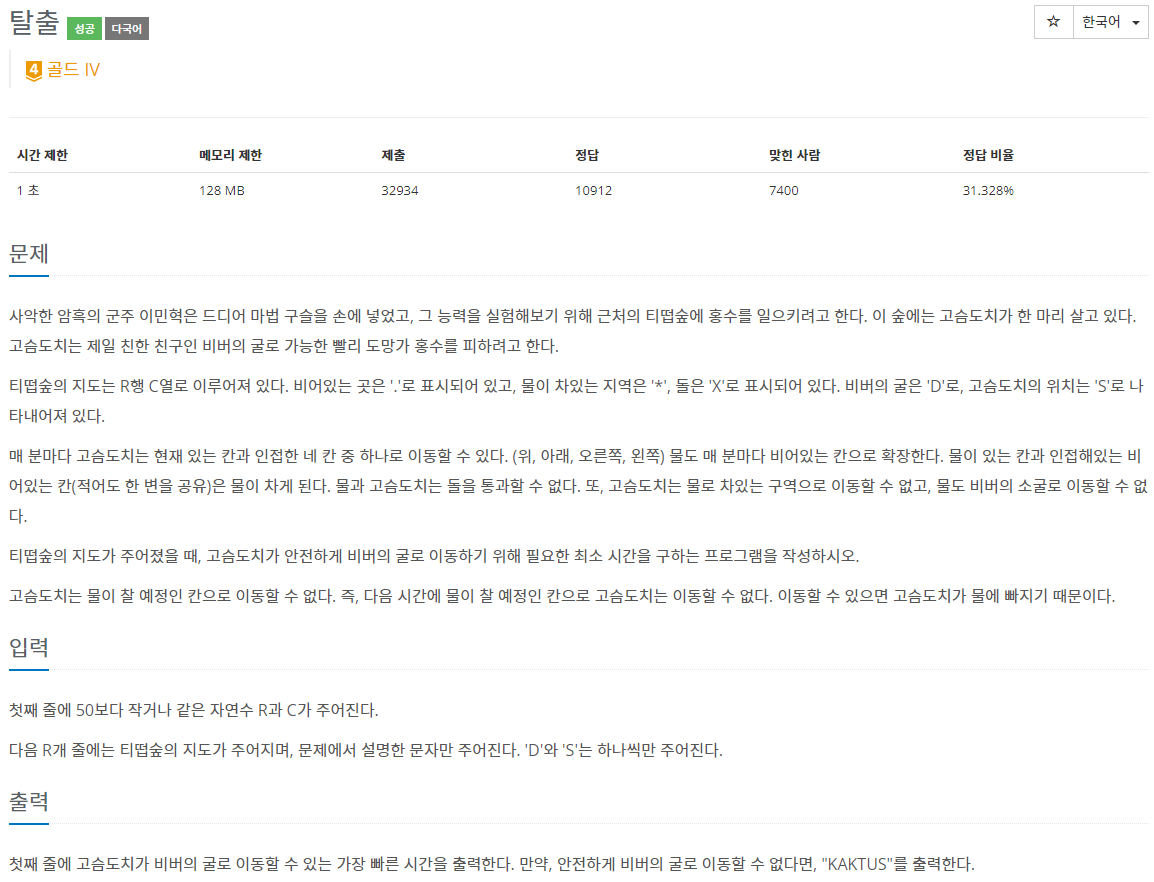

<!-- ![](image/3055.png) -->
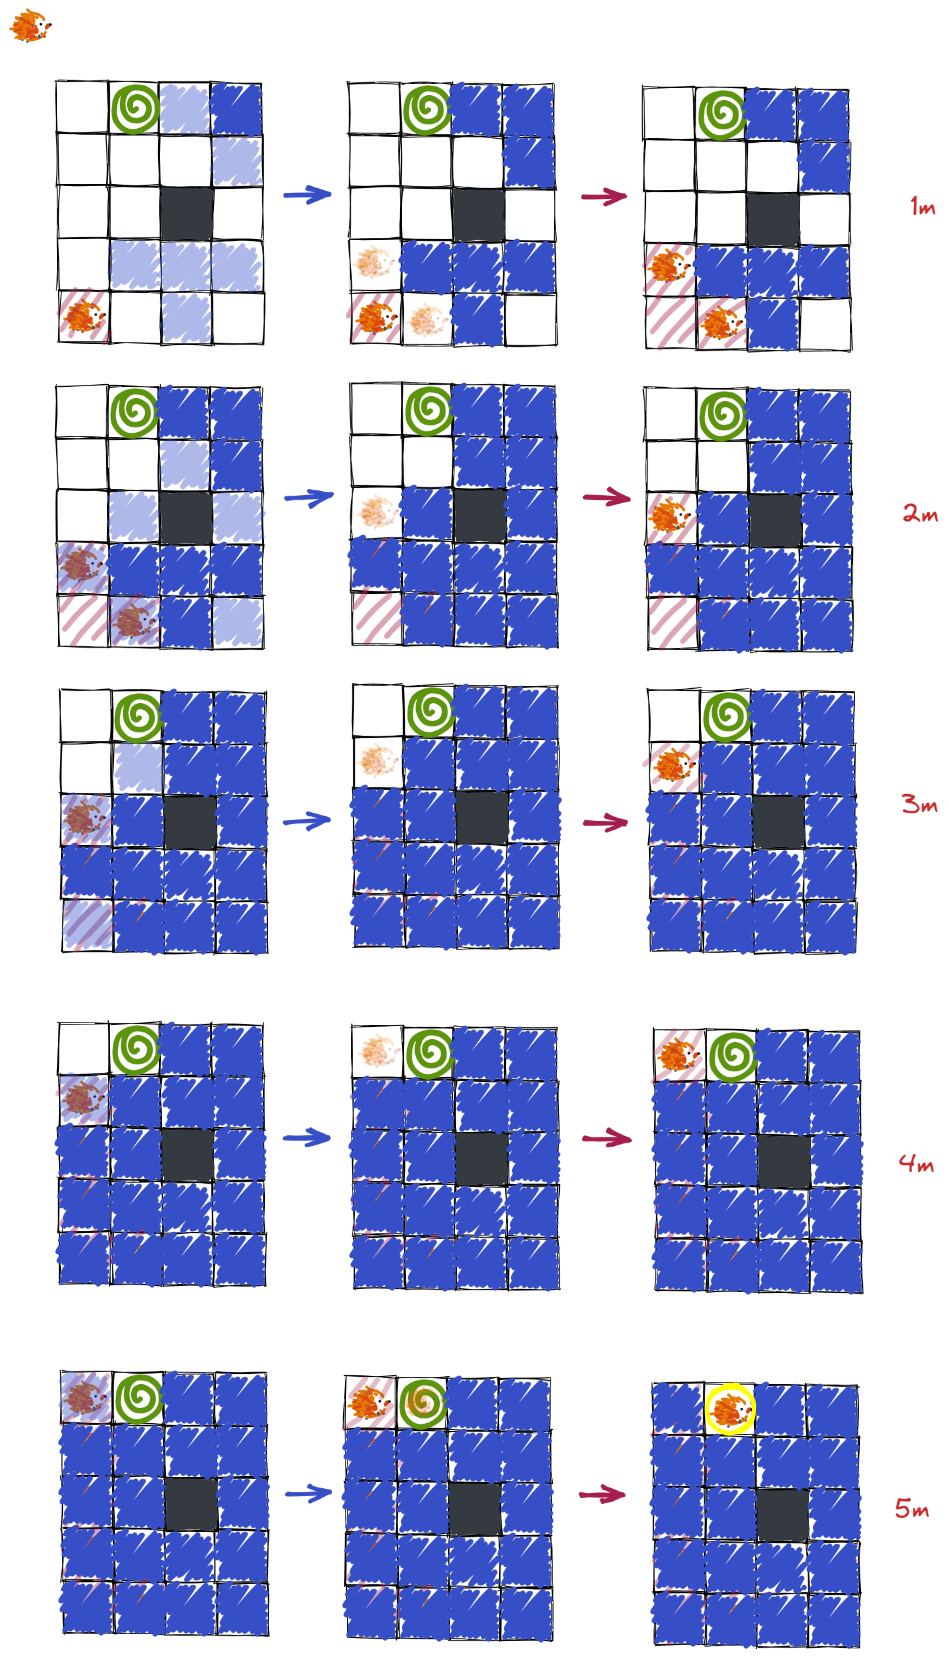

In [ ]:
import sys
from collections import deque

In [ ]:
def bfs():
    nw = len(water) # 현재 확장 시킬 물이 있는 곳의 개수
    nq = len(q) # 현재 시각 고슴도치가 존재 가능한 위치들의 개수
    while nw or nq:
        for i in range(nw): # 물이 차오를 곳으로는 고슴도치가 이동 불가하므로 물을 먼저 채울 것. 물에 인접한 모든 칸에 물이 차오른다.
            x, y = water.popleft()
            for j in range(len(dx)):
                nx, ny = x + dx[j], y + dy[j]
                if 0 <= nx < r and 0 <= ny < c and graph[nx][ny] not in {"D", "X"} and not visited[nx][ny]:
                    visited[nx][ny] = True
                    graph[nx][ny] = "*"
                    water.append((nx, ny))
        for i in range(nq): # 물이 차오른 후 남은 길에 고슴도치의 이동 가능 위치를 찾는다.
            x, y, cnt = q.popleft()
            if graph[x][y] == "*": # 현재 위치에 물이 차오른 상태라면 불가능한 경로이므로 continue
                continue
            for j in range(len(dx)): # 현재 물이 차오르지 않은 상태라면 다음 이동 경로 탐색
                nx, ny = x + dx[j], y + dy[j]
                if 0 <= nx < r and 0 <= ny < c and graph[nx][ny] not in {"*", "X"} and not visited[nx][ny]:
                    visited[nx][ny] = True
                    if graph[nx][ny] == "D": # 비버네 집
                        print(cnt + 1) ########################### 탈출
                        return
                    q.append((nx, ny, cnt+1))
        nw = len(water)
        nq = len(q)
    print("KAKTUS") ############################# 탈출 실패
    return

In [ ]:
input = sys.stdin.readline

r, c = map(int, input().split())
graph = []
water = deque()
q = deque()
visited = [[False]*c for _ in range(r)]
dx = [0, 1, 0, -1]
dy = [1, 0, -1, 0]

for i in range(r):
    graph.append(list(input().rstrip()))
    for j in range(c):
        if graph[i][j] == "*":
            visited[i][j] = True
            water.append((i, j))
        elif graph[i][j] == "S":
            visited[i][j] = True
            q.append((i, j, 0))

bfs()